In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import random
import time

## Part 1: The Power of Two Choices
**Description:** We consider random processes of the following type: there are N bins, and we throw N balls
into them, one by one. We'll compare four different strategies for choosing the bin in which to place a given
ball.

(a) (5 points) Write code to simulate strategies 1-4. For each strategy, there should be a function that
takes the number N of balls and bins as input, simulates a run of the corresponding random process,
and outputs the number of balls in the most populated bin (denoted by X below).

1 . Select one of the N bins uniformly at random, and place the current ball in it.

In [2]:
def s1(N):
    Bins = [[] for i in range(N)]
    Balls = [i for i in range(N)]
    Bins = [[] for i in range(N)]
    for ball in Balls:
        Bins[np.random.randint(0, N)].append(ball)
        
#    print('1: '+str(Bins))
    return max(map(len, Bins))

#s1(20)

2 . Select two of the N bins uniformly at random (either with or without replacement), and look at how
many balls are already in each. If one bin has strictly fewer balls than the other, place the current ball
in that bin. If both bins have the same number of balls, pick one of the two at random and place the
current ball in it.

In [3]:
def s2(N):
    Bins = [[] for i in range(N)]
    Balls = [i for i in range(N)]
    Bins = [[] for i in range(N)]
    for ball in Balls:
        bin1, bin2 = np.random.randint(0, N, 2)
        if ( len(Bins[bin1]) < len(Bins[bin2])):
            Bins[bin1].append(ball)
        elif ( len(Bins[bin1]) > len(Bins[bin2])):
            Bins[bin2].append(ball)
        else:
            Bins[bin1].append(ball) if np.random.randint(0,2) else Bins[bin2].append(ball)
    
#    print('2: '+str(Bins))
    return max(map(len, Bins))

# s1(20)

3 . Same as the previous strategy, except choosing three bins at random rather than two.

In [4]:
def s3(N):
    Bins = [[] for i in range(N)]
    Balls = [i for i in range(N)]
    Bins = [[] for i in range(N)]
    for ball in Balls:
        bin1, bin2, bin3 = np.random.randint(0, N, 3)
        l1, l2, l3 = len(Bins[bin1]), len(Bins[bin2]), len(Bins[bin3])
        if ( l1<=l2 and l1<=l3):
            Bins[bin1].append(ball)
        elif ( l2<=l1 and l2<=l3):
            Bins[bin2].append(ball)
        elif ( l3<=l1 and l3<=l2):
            Bins[bin3].append(ball)

#    print('3: '+str(Bins))
    return max(map(len, Bins))

#s3(20)

4 . Select two bins as follows: the first bin is selected uniformly from the first N/2 bins, and the second
uniformly from the last N/2 bins. (You can assume that N is even.) If one bin has strictly fewer balls
than the other, place the current ball in that bin. If both bins have the same number of balls, place
the current ball (deterministically) in the first of the two bins.

In [5]:
def s4(N):
    Bins = [[] for i in range(N)]
    Balls = [i for i in range(N)]
    Bins = [[] for i in range(N)]
    for ball in Balls:
        bin1 = np.random.randint(0, N/2)
        bin2 = np.random.randint(N/2, N)
        if np.random.randint(0,2):
            bin1, bin2 = bin2, bin1
        l1, l2 = len(Bins[bin1]), len(Bins[bin2])
        if (l1<=l2):
            Bins[bin1].append(ball)
        else:
            Bins[bin2].append(ball)
    

#    print('4: '+str(Bins))
    return max(map(len, Bins))

#s4(20)

(b) (10 points) Let N = 200,000 and simulate each of the four strategies 30 times. For each strategy, plot
the histogram of the 30 values of X. Discuss the pros and cons of the different strategies. Does one
of them stand out as a "sweet spot"?

In [6]:
X = [[] for i in range(4)]
T = [[] for i in range(4)]
N = 200000
for _ in range(30):
    time_start = time.clock()
    x = s1(N)
    time_end = time.clock()
    X[0].append(x)
    T[0].append(time_end-time_start)

for _ in range(30):
    time_start = time.clock()
    x = s2(N)
    time_end = time.clock()
    X[1].append(x)
    T[1].append(time_end-time_start)
    
for _ in range(30):
    time_start = time.clock()
    x = s3(N)
    time_end = time.clock()
    X[2].append(x)
    T[2].append(time_end-time_start)
    
for _ in range(30):
    time_start = time.clock()
    x = s4(N)
    time_end = time.clock()
    X[3].append(x)
    T[3].append(time_end-time_start)
    

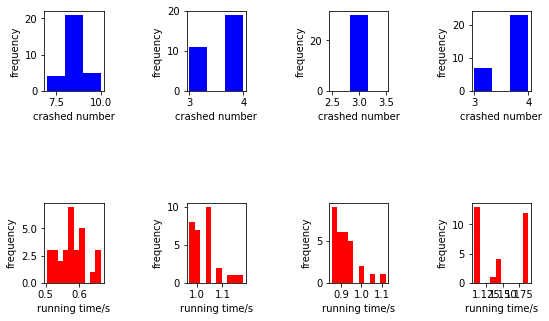

In [7]:
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(3,8,1+i*2)
    plt.hist(X[i], bins = 3, color = "blue", histtype = 'stepfilled')
    plt.xlabel('crashed number')
    plt.ylabel('frequency')
#     plt.set_title('X of '+str(i))

    plt.subplot(3,8,17+i*2)
    plt.hist(T[i], bins = 10, color = "red", histtype = 'stepfilled')
    plt.xlabel('running time/s')
    plt.ylabel('frequency')
#     plt.set_title('time of '+str(i))
    
plt.show()
plt.close()

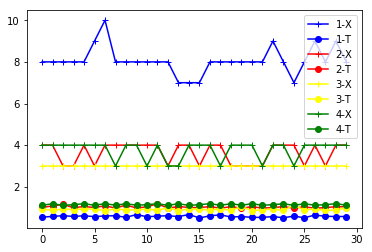

In [8]:
colors = ["blue", "red", "yellow", "green"]
for i in range(4):
    l1, = plt.plot(X[i], color = colors[i], marker='+')
    l2, = plt.plot(T[i], color = colors[i], marker='o')

plt.legend(['1-X','1-T','2-X','2-T','3-X','3-T','4-X','4-T'], loc='best')
    
plt.show()

<font color=blue>**Ans:** The first strategy is the fastest one to insert balls into the bins while this strategy gains the largest amount of crashed number. Strategies 2-4 alleviate the problem that causing huge amount of crashed balls at the price of nearly twice running time as much as that of the first strategy. We can conclude that the third strategy is the "sweet spot" since it affords the best leverage between crashed number and running time.</font>

(c) (5 points) Propose an analogy between the first of the random processes above and the standard
implementation of hashing N elements into a hash table with N buckets, and resolving collisions via
chaining (i.e., one linked list per bucket). Discuss in particular any relationships between X and search
times in the hash table.

<font color=blue>**Ans:** When the hash function is good enough, it will provide the random bin index uniformly. In hash table, when X grows larger, chainings become longer. As a consequence, searching times is longer.
</font>

(d) (5 points) Do the other random processes suggest alternative implementations of hash tables with
chaining? Discuss the trade-offs between the different hash table implementations that you propose
(e.g., in terms of insertion time vs. search time).

<font color=blue>**Ans: ** Select four of the N bins uniformly at random, and place the current ball in the bin with the minimun amount of balls. Because we should pick the minimum bins, it would take more time. By the conclusion of (b), we could say that the crashed frequency would be lower. 
</font>

## Part 2: Conservative Updates in a Count-Min Sketch

Description: You’ll use a count-min sketch with 4 independent hash tables, each with 256 counters. Your
sketch should take a “trial” as input, and the hash value of an element x during trial i (i = 1, 2, . . . , 10) for
table j (j = 1, 2, 3, 4) is calculated as follows:

* Consider the input x as a string, and append i − 1 as a string to the end of the string.
* Calculate the MD5 score of the resulting string.2 Do not implement the MD5 algorithm yourself; most
modern programming languages have packages that calculate MD5 scores for you. For example, in
Python 3, you can use the hashlib library and hashlib.md5(foo.encode(’utf-8’)).hexdigest()
to compute the MD5 score of the string foo (returning a hexidecimal string).
* The hash value is the j-th byte of the score.

(a) (5 points) Implement the count-min sketch, as above.
You will be feeding data streams (i.e., sequences of elements) into count-min sketches. Every element of
each stream is an integer between 1 and 9050 (inclusive). The frequencies are given by:
* Integers 1000 · (i − 1) + 1 to 1000 · i, for 1 ≤ i ≤ 9, appear i times in the stream. That is, the integers
1 to 1000 appear once in the stream; 1001 to 2000 appear twice; and so on.
* An integer 9000 + i, for 1 ≤ i ≤ 50, appears i
2
times in the stream. For example, the integer 9050
appears 2500 times.

In [9]:
# create the numeric input stream
Input = []
for i in range(0,9):
    inp = np.random.randint(i*1000, i*1000+1000)+1
    for _ in range(i+1):
        Input.append(inp)

for i in range(1, 51):
    for _ in range(i*i):
        Input.append(9000+i)


(b) (2 points) Call an integer a heavy hitter if the number of times it appears is at least 1% of the total
number of stream elements. How many heavy hitters are there in a stream with the above frequencies?
Next, you will consider 3 different data streams, each corresponding to the elements above in a different
order.
1. Forward: the elements appear in non-decreasing order.
2. Reverse: the elements appear in non-increasing order.
3. Random: the elements appear in a random order.

In [10]:
b = 256
l = 4

def inc(numeric_input):
    string_input = str(numeric_input)
    long_index = int(hashlib.md5(string_input.encode('utf8')).hexdigest(), 16)
    for i in range(l):
        cms[i][long_index%256] += 1
        long_index //= 256
        
# Forward
cms = np.zeros((l,b))
for inp in Input:
    inc(inp)
        
cms1 = cms

#Reverse
cms = np.zeros((l,b))
for inp in reversed(Input):
    inc(inp)

cms2 = cms

# Random
cms = np.zeros((l,b))
random.shuffle(Input)
for inp in Input:
    inc(inp)
        
cms3 = cms

In [11]:
heavy = len(Input)/100
heavy

429.7

<font color=blue>**Ans: ** Since 1% of the total number is 429.7 < $21^2$, number 9021 - 9050 are heavy hitters. There are totally 30 heavy hitters.
</font>

(c) (6 points) For each of the three data streams, feed it into a count-min sketch (i.e., successively insert
its elements), and compute the values of the following quantities, averaged over the 10 trials, for each
order of the stream:

– The sketch’s estimate for the frequency of element 9050.

– The sketch’s estimate for the number of heavy hitters (elements with estimated frequency at least
1% of the stream length).

Does the order of the stream affect the estimated counts? Explain your answer.

In [12]:
#count the min count from the table
def count(numeric_input, c):
    string_input = str(numeric_input)
    long_index = int(hashlib.md5(string_input.encode('utf8')).hexdigest(), 16)
    min_count = 99999
    for i in range(l):
        min_count = min(c[i][long_index%256], min_count)
        long_index //= 256
    return min_count

def test(c):
    print('sketch\'s estimate for the frequence of element 9050: ', count(9050, c))
    num = 0
    hitters = []
    for i in range(1,9051):
        if count(i, c) > heavy:
            hitters.append(i)
    print('hitter numbers: ' + str(len(hitters)))
    print('There are: ', str(hitters))
    
test(cms1)
test(cms2)
test(cms3)

sketch's estimate for the frequence of element 9050:  2500.0
hitter numbers: 33
There are:  [2238, 3761, 4394, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050]
sketch's estimate for the frequence of element 9050:  2500.0
hitter numbers: 33
There are:  [2238, 3761, 4394, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050]
sketch's estimate for the frequence of element 9050:  2500.0
hitter numbers: 33
There are:  [2238, 3761, 4394, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050]


<font color=blue>**Ans: ** Different order of the stream doesn't influence the amount of the heavy hitters. This algorithm is order insensitive. The reason is that no matter which number we input currently, the corresponding positions of this number in the CMS will execute increase function. The corresponding positions of the number won't be influenced by the input order. After inputting all number, elements of CMS with different input order will maintain identical value, which is exploited to gain heavy hitters. Therefore, different input order will get the same hitter number.
</font>

(d) (3 points) Implement the conservative updates optimization, as follows. When updating the counters
during an insert, instead of incrementing all 4 counters, we only increment the subset of these 4 counters
that have the lowest current count (if two or more of them are tied for the minimum current count,
then we increment each of these).

In [13]:
cms = np.zeros((l,b))
def inc2(numeric_input):
    string_input = str(numeric_input)
    md5_string = hashlib.md5(string_input.encode('utf8')).hexdigest()
    min_count = 9999
    argmin = []
    for i in range(l):
        index = GetHashIndex(md5_string, i)
        if(cms[i][index] < min_count):
            argmin = [i]
            min_count = cms[i][index]
        elif(cms[i][index] == min_count):
            argmin.append(i)
            min_count = cms[i][index]
    
    for each in argmin:
        index = GetHashIndex(md5_string, each)
        cms[each][index] += 1
    
    
def GetHashIndex(md5_string, index):
    if(index == 0):
        return int(md5_string[-2:], 16)
    elif(index > 0 and index < b):
        return int(md5_string[-2-2*index:-2-2*index+2], 16)

(e) (3 points) Explain why, even with conservative updates, the count-min sketch never underestimates
the count of a value.

<font color=blue>**Ans:**

*base step*: 

When all element in cms are zero, insert a new string causing all correspond cms element increase. So the count-min sketch doesn't underestimate the count of the value.

*iterate step*:

Suppose the count-min sketch doesn't underestiate the count of the correspond value after n steps. 
<center>
$ count(v_i) \geq frequency(v_i)~~$ for $\forall i$
</center>

A new value $v_j$ insert, causing the lowest current count increase, we have:

$$ count(v_j) + 1 \geq frequency(v_j) + 1$$
$$ newcount(v_j) \geq newfrequency(v_j)$$

still satisfying:
<center>$ count(v_i) \geq frequency(v_i)~~$ for $\forall i$</center>

From mathematical induction, we conclude that the count-min sketch never underestimates the count of a value.
</font>

(f) (6 points) Repeat part (c) with conservative updates.

In [14]:
#count the min count from the table
# Forward
cms = np.zeros((l,b))
for inp in Input:
    inc2(inp)
        
test(cms)

sketch's estimate for the frequence of element 9050:  2500.0
hitter numbers: 32
There are:  [2238, 4394, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050]


<font color=blue>
We can see it has less wrong hitter(e.g. 2238, 4394) than the one before optimization.
</font>